In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
corolla = pd.read_csv('./data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


### 범주형 변수를 이진형 변수로 변환

In [5]:
# 가변수 생성
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [6]:
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [7]:
# 인덴스 슬라이싱후 binary=1 대입
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')
c_idx = np.array(corolla.Fuel_Type == 'CNG')

In [8]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [9]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [10]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

### 불필요한 변수 제거 및 가변수 추가

In [11]:
Fuel = pd.DataFrame({'Petrol':dummy_p,
                    'Diesel':dummy_d,
                    'CNG':dummy_c})

In [12]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [13]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis=1)
mlr_data = pd.concat((corolla_, Fuel), 1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [14]:
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


### 설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [15]:
feature_columns = list(mlr_data.columns.difference(['Price']))

In [16]:
X = mlr_data[feature_columns]
y = mlr_data.Price

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [17]:
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [18]:
print(fitted_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     299.0
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:17:07   Log-Likelihood:                -8487.8
No. Observations:                1005   AIC:                         1.704e+04
Df Residuals:                     971   BIC:                         1.721e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -328.3942    137.285  

### VIF를 통한 다중공선성 확인

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif['features'] = mlr_data.columns
vif

,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


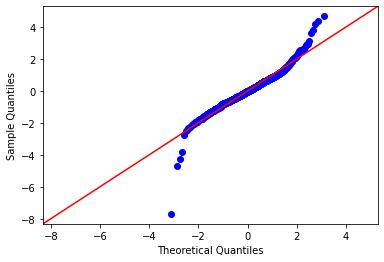

In [20]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# 잔차의 정규성 확인
fig = sm.qqplot(res, fit=True, line='45')

In [21]:
pred_y = fitted_full_model.predict(train_x)

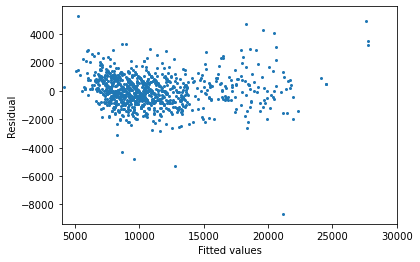

In [22]:
import matplotlib.pyplot as plt

fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [23]:
# 검증 데이터에 대한 예측

pred_y2 = fitted_full_model.predict(test_x)

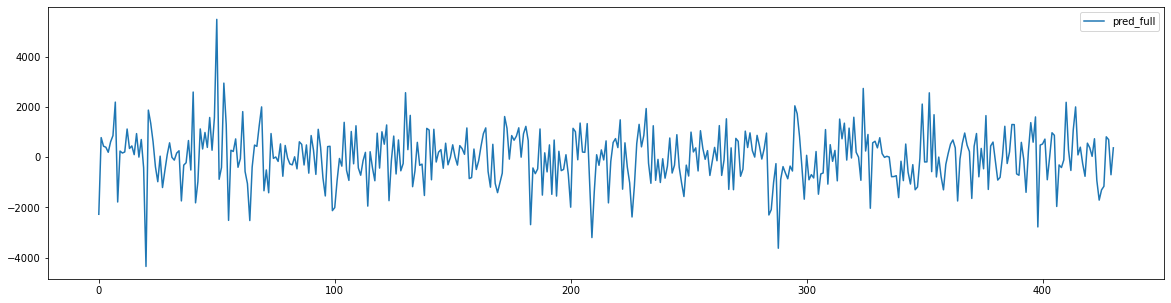

In [24]:
plt.figure( figsize=(20,5) )
plt.plot(np.array(test_y - pred_y2), label = 'pred_full')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
# MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

1105211.9872644376

### 변수선택법

In [27]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {'model':regr, 'AIC':AIC}

In [28]:
print(processSubset(X=train_x, y=train_y, feature_set=feature_columns[0:5]))
print(processSubset(X=train_x, y=train_y, feature_set=feature_columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F943042BB0>, 'AIC': 19124.20975298942}
{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F93DFB7280>, 'AIC': 17043.546972565167}


In [29]:
import time
import itertools

# 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X, y, k): # k:변수의 수
    tic = time.time() #시작시간
    results = []
    
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo = (list(combo) + ['const'])
        results.append(processSubset(X, y, feature_set=combo)) # 모델 저장
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    
    print('Processed', models.shape[0], 'modles on', k, 'predictors in', (toc - tic), 'seconds.')

    return best_model

In [30]:
print(getBest(X=train_x, y=train_y, k=2))

Processed 630 modles on 2 predictors in 1.325453519821167 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17633.246601
Name: 211, dtype: object


In [31]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print(list(combo) + ['const'])

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [32]:
# 변수 선택에 따른 학습시간과 저장

models = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1, 4):
    models.loc[i] = getBest(X=train_x, y=train_y, k=i)
toc = time.time()
print('Total elapsed time:', (toc-tic), 'seconds')

Processed 36 modles on 1 predictors in 0.1406245231628418 seconds.
Processed 630 modles on 2 predictors in 1.1908161640167236 seconds.
Processed 7140 modles on 3 predictors in 12.203409433364868 seconds.
Total elapsed time: 13.781144142150879 seconds


In [33]:
models

,AIC,model
1,17906.678789,<statsmodels.regression.linear_model.Regressio...
2,17633.246601,<statsmodels.regression.linear_model.Regressio...
3,17426.095403,<statsmodels.regression.linear_model.Regressio...


In [34]:
print(models.loc[3, 'model'].summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2064.
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:17:24   Log-Likelihood:                -8709.0
No. Observations:                1005   AIC:                         1.743e+04
Df Residuals:                    1001   BIC:                         1.745e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0266      0.001    -18.463      0.0

In [35]:
selected_model = models.loc[3, 'model']

In [36]:
# 모든 변수들 모델링 한 것과 비교
print(f'full model R-squared: {fitted_full_model.rsquared:.5f}')
print(f'full model AIC: {fitted_full_model.aic:.5f}')
print(f'selected model R-squared: {selected_model.rsquared:.5f}')
print(f'selected model AIC: {selected_model.aic:.5f}')

full model R-squared: 0.91040
full model AIC: 17043.54697
selected model R-squared: 0.86083
selected model AIC: 17426.09540


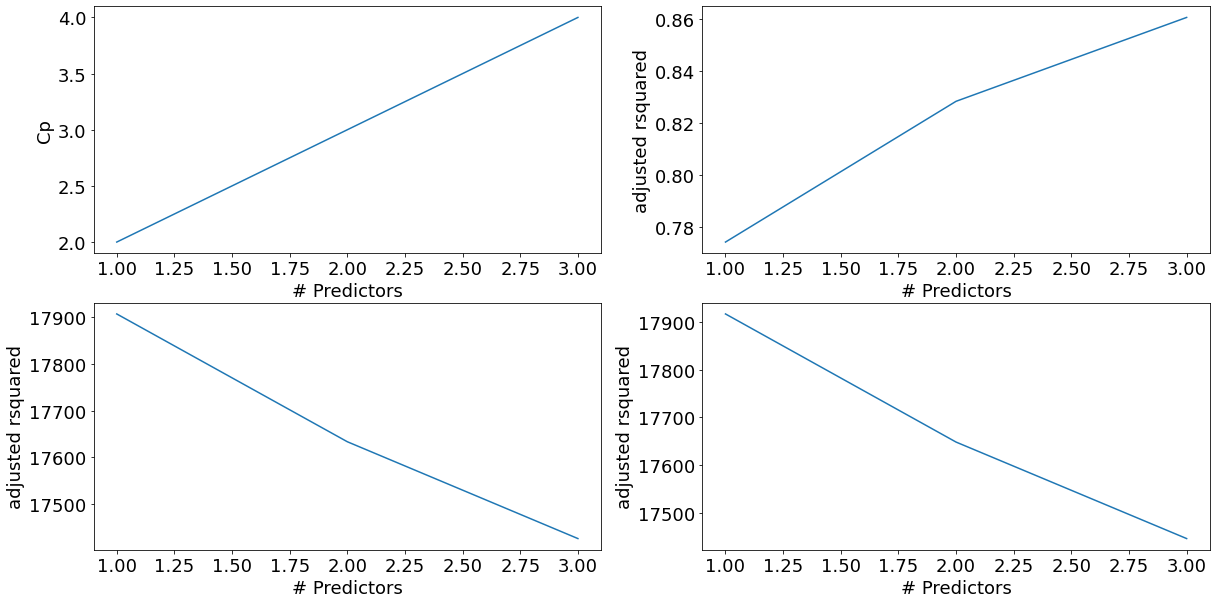

In [37]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18, 'lines.markersize':10})

# Mallow Cp
plt.subplot(2, 2, 1)
Cp = models.apply(lambda row: (row[1].params.shape[0] + 
                               (row[1].mse_total-fitted_full_model.mse_total)*
                               (train_x.shape[0]-row[1].params.shape[0])/
                               fitted_full_model.mse_total), axis=1)
plt.plot(Cp)
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2,2,2)
plt.plot(adj_rsquared)
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2,2,3)
plt.plot(aic)
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2,2,4)
plt.plot(bic)
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

plt.show()

### 전진선택법

In [42]:
# 전진선택법(step=1)

def forward(X, y, predictors):
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set = predictors + [p] + ['const']))
    
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in', (toc-tic))
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC: ', best_model)
    
    return best_model

In [45]:
# 전진선택법 모델

def forward_model(X, y):
    Fmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    predictors = []
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names
        Fmodel_before = Fmodels.loc[i]['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    
    print('Total elapsed time:', (toc-tic), 'seconds.')
    
    return(Fmodels['model'][len(Fmodels['model'])])

In [46]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed 36 models on 1 predictors in 0.06979513168334961
Selected predictors: ['Mfg_Year', 'const'] AIC:  model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17906.678789
Name: 23, dtype: object
Processed 35 models on 2 predictors in 0.05285382270812988
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const'] AIC:  model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17633.246601
Name: 6, dtype: object
Processed 34 models on 3 predictors in 0.045873165130615234
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const'] AIC:  model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17505.065556
Name: 17, dtype: object
Processed 33 models on 4 predictors in 0.04687643051147461
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const'] AIC:  model    <statsmodels.regression.linear_model.Regressio...
AIC 

Processed 13 models on 24 predictors in 0.050859689712524414
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Sport_Model', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'BOVAG_Guarantee', 'Metallic_Rim', 'ABS', 'Mfr_Guarantee', 'Backseat_Divider', 'Tow_Bar', 'Automatic', 'Age_08_04', 'Airco', 'Boardcomputer', 'CD_Player', 'CNG', 'cc', 'Diesel', 'const'] AIC:  model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17031.277362
Name: 4, dtype: object
Processed 12 models on 25 predictors in 0.05784130096435547
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Sport_Model', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'BOVAG_Guarantee', 'Metallic_Rim', 'ABS', 'Mfr_Guarantee', 'Backseat_Divider', 'Tow_Bar', 'Automatic', 'Age_08_04', 'Airco', 'Boardcomputer', 'CD_Player', 'CNG', 'cc', 'Diesel', 'Cylinders', 'const'] AIC:  model    <statsmodels.regre

In [47]:
Forward_best_model.aic

17031.277361795197

In [48]:
print(Forward_best_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     429.7
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:35:43   Log-Likelihood:                -8491.6
No. Observations:                1005   AIC:                         1.703e+04
Df Residuals:                     981   BIC:                         1.715e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1168.4233    132.268  

### 후진소거법

In [59]:
# 후진소거법(step=1)

def backward(X, y, predictors):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(X=X, y=y, feature_set=list(combo)+['const']))
    
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed', models.shape[0], 'models on', len(predictors)-1, 'predictors in', (toc-tic))
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model)
    
    return best_model

In [60]:
# 후진소거법 모델

def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=['AIC', 'model'], index=range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    
    while len(predictors) > 1:
        Backward_result = backward(X=train_x, y=train_y, predictors=predictors)
        
        if Backward_result['AIC'] > Bmodel_before:
            break
            
        Bmodels.loc[len(predictors)-1] = Backward_result
        predictors = Bmodels.loc[len(predictors)-1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print("Total elapsed time:", (toc-tic), 'seconds.')
    return Bmodels['model'].dropna().iloc[0]

In [61]:
Backward_best_model = backward_model(X=train_x, y=train_y)

Processed 36 models on 35 predictors in 0.15756559371948242
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'] AIC: model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17041.547226
Name: 23, dtype: object
Processed 35 models on 34 predictors in 0.12864947319030762
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', '

In [62]:
print(Backward_best_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     396.7
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:52:43   Log-Likelihood:                -8489.2
No. Observations:                1005   AIC:                         1.703e+04
Df Residuals:                     979   BIC:                         1.716e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -285.8543    108.772  

### 단계적 선택법

In [68]:
def stepwise_model(X, y):
    Stepmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X, y, predictors+['const'])['AIC']
    
    for i in range(1, len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        
        if Backward_result['AIC'] < Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'const']
            print('backward')
            
        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
            
    toc = time.time()
    
    print('Total elapsed time:', (toc-tic), 'seconds.')
    
    return Stepmodels['model'][len(Stepmodels['model'])]

In [69]:
Stepwise_best_model = stepwise_model(X=train_x, y=train_y)

Processed 36 models on 1 predictors in 0.06282711029052734
Selected predictors: ['Mfg_Year', 'const'] AIC:  model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17906.678789
Name: 23, dtype: object
forward
Processed 1 models on 0 predictors in 0.0029921531677246094
Selected predictors: ['const'] AIC: model    <statsmodels.regression.linear_model.Regressio...
AIC                                           19401.998297
Name: 0, dtype: object
Processed 35 models on 2 predictors in 0.0528566837310791
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const'] AIC:  model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17633.246601
Name: 6, dtype: object
forward
Processed 2 models on 1 predictors in 0.007978439331054688
Selected predictors: ['Mfg_Year', 'const'] AIC: model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17906.678789
Name:

Processed 23 models on 14 predictors in 0.06881189346313477
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Sport_Model', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'BOVAG_Guarantee', 'Metallic_Rim', 'ABS', 'Mfr_Guarantee', 'const'] AIC:  model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17042.994996
Name: 16, dtype: object
forward
Processed 14 models on 13 predictors in 0.03490471839904785
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Sport_Model', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'BOVAG_Guarantee', 'Metallic_Rim', 'ABS', 'const'] AIC: model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17045.703378
Name: 0, dtype: object
Processed 22 models on 15 predictors in 0.06084251403808594
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Win

Processed 22 models on 21 predictors in 0.0757906436920166
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Sport_Model', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'BOVAG_Guarantee', 'Metallic_Rim', 'ABS', 'Mfr_Guarantee', 'Backseat_Divider', 'Tow_Bar', 'Automatic', 'Age_08_04', 'Airco', 'Boardcomputer', 'CD_Player', 'const'] AIC: model    <statsmodels.regression.linear_model.Regressio...
AIC                                            17031.96571
Name: 0, dtype: object
Processed 14 models on 23 predictors in 0.04687213897705078
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Sport_Model', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'BOVAG_Guarantee', 'Metallic_Rim', 'ABS', 'Mfr_Guarantee', 'Backseat_Divider', 'Tow_Bar', 'Automatic', 'Age_08_04', 'Airco', 'Boardcomputer', 'CD_Player', 'CNG', 'cc', 'const'] AIC:  model    <statsmodels.regression.linear_model.Regressio...
AIC              

Processed 24 models on 23 predictors in 0.07978487014770508
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Sport_Model', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'BOVAG_Guarantee', 'Metallic_Rim', 'ABS', 'Mfr_Guarantee', 'Backseat_Divider', 'Tow_Bar', 'Automatic', 'Age_08_04', 'Airco', 'Boardcomputer', 'CD_Player', 'cc', 'Diesel', 'const'] AIC: model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17031.277362
Name: 0, dtype: object
backward
Processed 13 models on 24 predictors in 0.03390812873840332
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Sport_Model', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'BOVAG_Guarantee', 'Metallic_Rim', 'ABS', 'Mfr_Guarantee', 'Backseat_Divider', 'Tow_Bar', 'Automatic', 'Age_08_04', 'Airco', 'Boardcomputer', 'CD_Player', 'cc', 'Diesel', 'CNG', 'const'] AIC:  model    <statsmodels.regression.linear_

In [70]:
Stepwise_best_model.aic

17031.27736179521

### 성능평가

In [71]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(26,) (28,) (24,)


In [72]:
Forward_best_model.model.exog_names

['Mfg_Year',
 'Automatic_airco',
 'HP',
 'Weight',
 'KM',
 'Powered_Windows',
 'Sport_Model',
 'Guarantee_Period',
 'Quarterly_Tax',
 'Petrol',
 'BOVAG_Guarantee',
 'Metallic_Rim',
 'ABS',
 'Mfr_Guarantee',
 'Backseat_Divider',
 'Tow_Bar',
 'Automatic',
 'Age_08_04',
 'Airco',
 'Boardcomputer',
 'CD_Player',
 'CNG',
 'cc',
 'Diesel',
 'Cylinders',
 'const']

In [73]:
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [74]:
perf_mat = pd.DataFrame(columns=['ALL', 'FORWARD', 'BACKWARD', 'STEPWISE'],
                        index=['MSE', 'RMSE', 'MAE', 'MAPE'])

In [78]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100

In [76]:
from sklearn import metrics

In [79]:
# 성능지표

perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y, pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y, pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y, pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y, pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD        BACKWARD        STEPWISE
MSE   1105211.987264  1074904.624047  1091744.711562  1074904.624052
RMSE     1051.290629     1036.776072     1044.865882     1036.776072
MAE       801.354371      793.699285      796.409806      793.699285
MAPE        8.082895        8.019627        8.035657        8.019627


In [80]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
26
28
24
